## Análisis del Funnel de Conversión en "loquiero.com"

"loquiero.com" es una plataforma de comercio electrónico de variada selección de productos, desde tecnología hasta moda y artículos para el hogar. A medida que la competencia en el espacio de comercio electrónico se intensifica, esta startup busca optimizar su funnel de conversión para mejorar la experiencia del cliente y aumentar las ventas.

A pesar del creciente tráfico web y la alta calidad de los productos ofrecidos, ha identificado que no todos los usuarios registrados realizan compras, y un número significativo de carritos son abandonados. El desafío consiste en analizar el comportamiento de los usuarios a lo largo del funnel de conversión para identificar puntos críticos de abandono y oportunidades de mejora.

##### Objetivos

Entender el Comportamiento del Usuario: Analizar cómo los diferentes usuarios navegan a través del funnel de conversión, desde el registro hasta la compra final.

Identificar Puntos de Abandono: Determinar en qué etapas del funnel los usuarios tienden a abandonar, con especial atención en los carritos abandonados.

Optimizar el Funnel de Conversión: Proponer acciones basadas en el análisis para mejorar la tasa de conversión, como mejoras en la interfaz de usuario, personalización de ofertas, o estrategias de retargeting.


##### Datos Disponibles

Fecha de registro

Número de sesiones antes de la compra

Si visitaron o no la página del producto

Si abandonaron el carrito

El valor total de la compra (si aplica)

In [5]:
# Importa las librerías necesarias para realizar en analisis.

import pandas as pd
import matplotlib.pyplot as plt


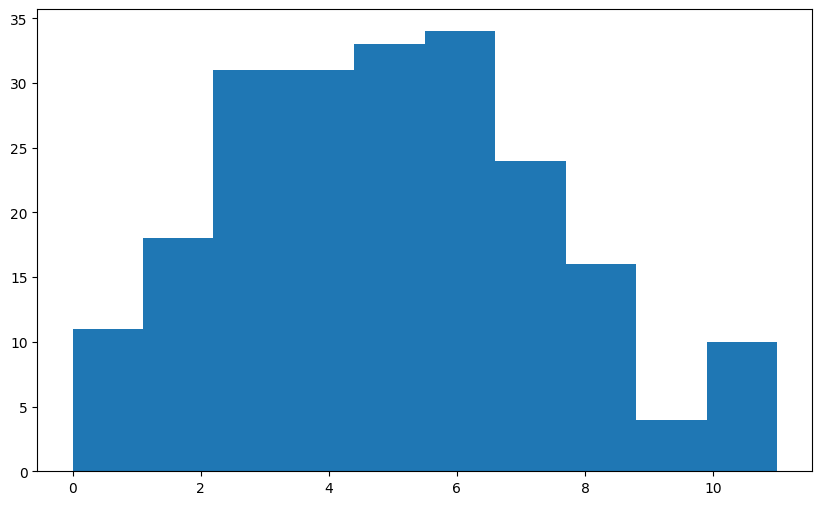

In [17]:
# Muestra en un histograma, la distribución del numero de sesiones que realiza un usuario antes de realizar una compra.
# De momento no agregues ningun tipo de personalizaciones.

# Carga de datos (reemplaza 'tu_ruta_al_archivo.csv' con la ruta real del archivo CSV)
df = pd.read_csv('ecommerce_funnel_analysis.csv')

# Filtrar usuarios que han finalizado una compra
df_purchased = df[df['PurchaseValue'] > 0]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un histograma en los ejes especificados
ax.hist(df_purchased['SessionsBeforePurchase'], bins=10)


plt.show()

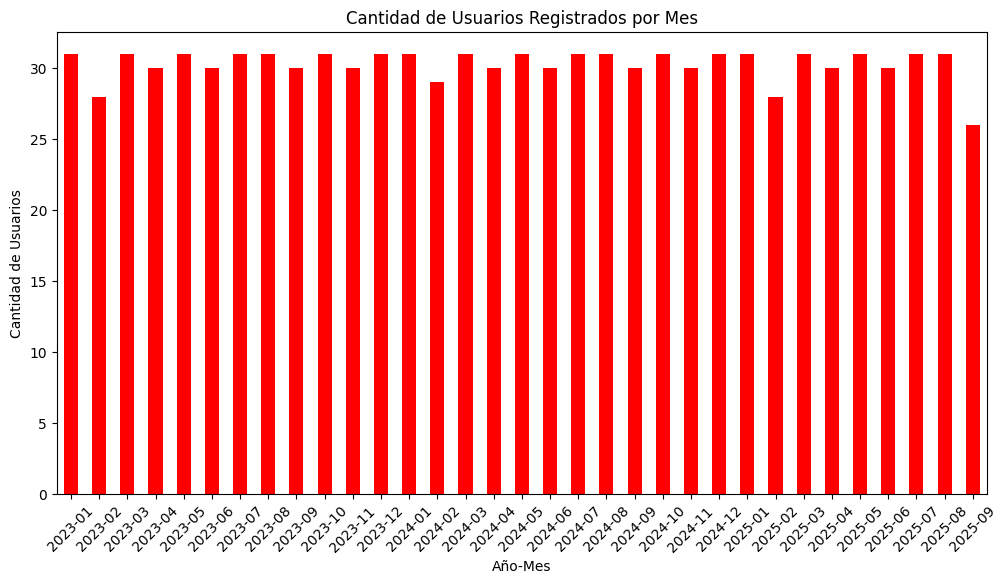

In [31]:
# Realiza un grafico de barras que muestre la cantidad de usuarios que se registraron por mes.
# Incluye titulos, etiquetas, barras de color rojo y rotación del eje en 45°.

# Convertir 'RegistrationDate' a datetime
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'])

# Agrupar por mes y contar registros
df['YearMonth'] = df['RegistrationDate'].dt.to_period('M')
registrations_per_month = df.groupby('YearMonth').size()

# Crear la figura y los ejes juntos
fig, ax = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barras en los ejes especificados
registrations_per_month.plot(kind='bar', color='red')

# Configurar título y etiquetas
ax.set_title('Cantidad de Usuarios Registrados por Mes')
ax.set_xlabel('Año-Mes')
ax.set_ylabel('Cantidad de Usuarios')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)


plt.show()


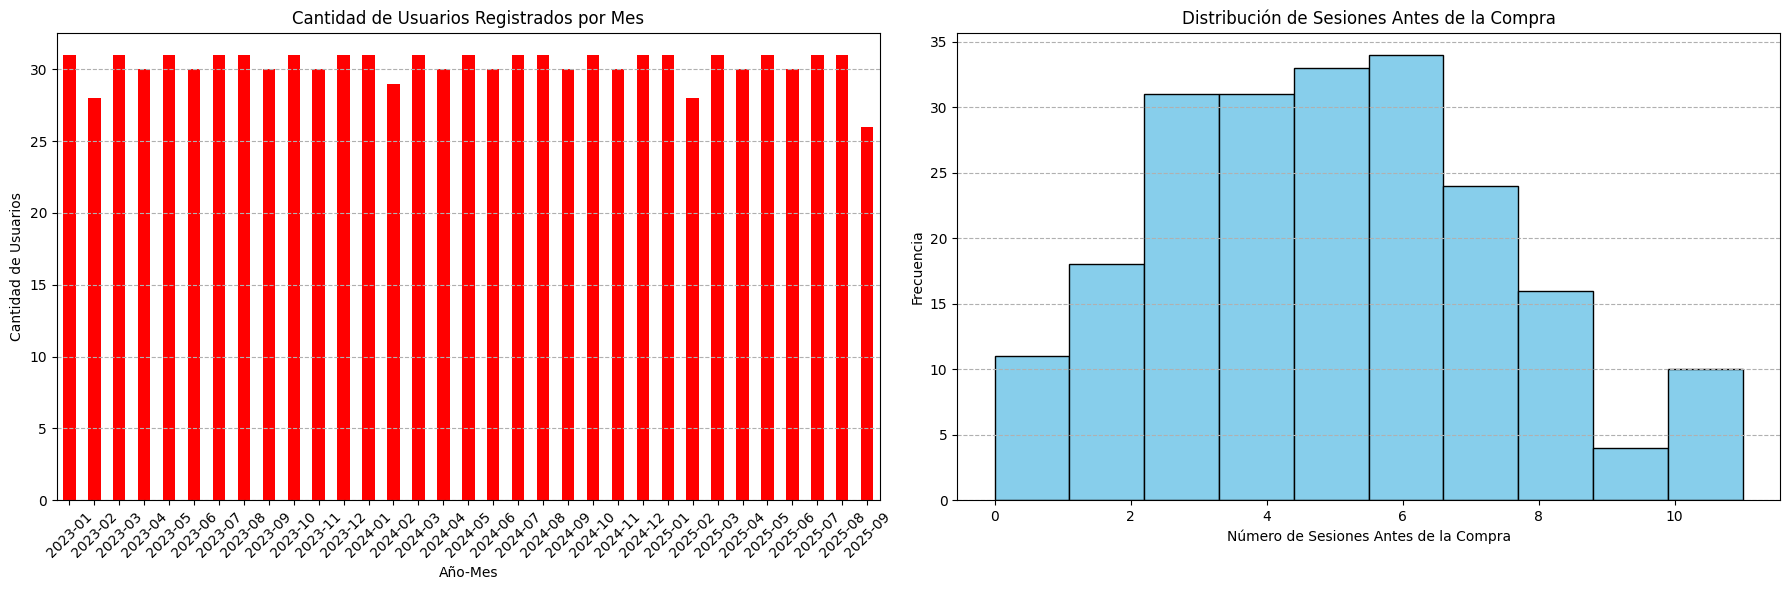

In [32]:
# Presenta las dos visualizaciones de los puntos anteriores en una sola figura, personalizando el histograma con: titulo, etiquetas, bordes y grilla.

# Convertir 'RegistrationDate' a datetime y 'YearMonth' para agrupar
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'])
df['YearMonth'] = df['RegistrationDate'].dt.to_period('M')

# Datos para el gráfico de barras
registrations_per_month = df.groupby('YearMonth').size()

# Filtrar para el histograma (opcional, según necesidad)
df_purchased = df[df['PurchaseValue'] > 0]  # Asumiendo que quieres solo usuarios que hicieron compra

# Crear figura y ejes para dos subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Gráfico de barras: Cantidad de Usuarios Registrados por Mes
registrations_per_month.plot(kind='bar', color='red', ax=axs[0])
axs[0].set_title('Cantidad de Usuarios Registrados por Mes')
axs[0].set_xlabel('Año-Mes')
axs[0].set_ylabel('Cantidad de Usuarios')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--')

# Histograma: Sesiones Antes de la Compra
axs[1].hist(df_purchased['SessionsBeforePurchase'], bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Distribución de Sesiones Antes de la Compra')
axs[1].set_xlabel('Número de Sesiones Antes de la Compra')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(axis='y', linestyle='--')

plt.tight_layout()  # Ajusta automáticamente los subplots para que se ajusten en la figura
plt.show()